In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data
df = pd.read_csv(r"C:\Users\girir\OneDrive - University of Salford\ml assignment\loan dataset.zip")

Exploring Data

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [6]:
df.shape

(45000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
# checking for null values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# code to replace null if present in data using mean
df.fillna(df.mean(), inplace=True)

In [10]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
# checking for duplicate
df.duplicated().sum()

0

Exploratory Data Analysis

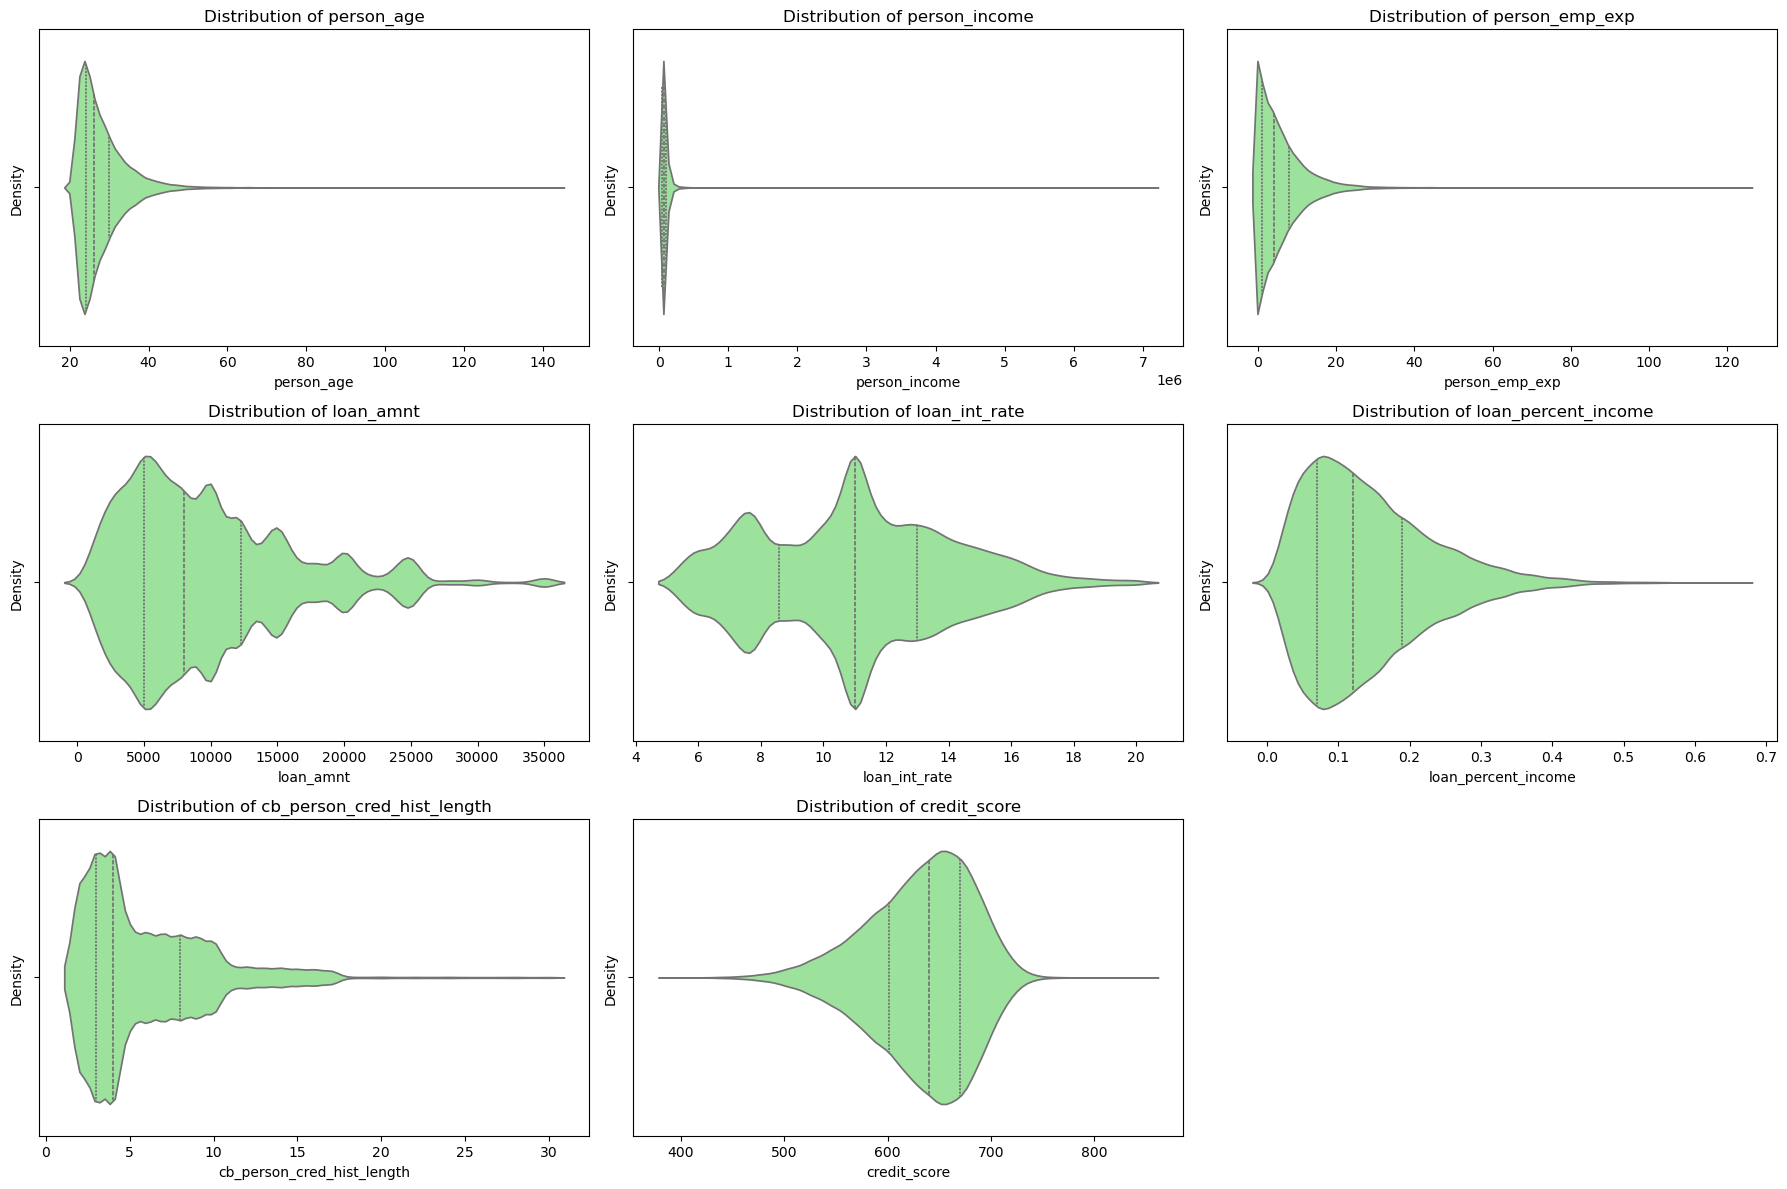

In [13]:
# List of numerical features to plot
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                      'credit_score']

# Set the figure size for the plots
plt.figure(figsize=(18, 12))

# Loop through each feature and create a violin plot
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x=feature, color='lightgreen', inner="quartile")
    
    # Set plot title and axis labels with actual values shown
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


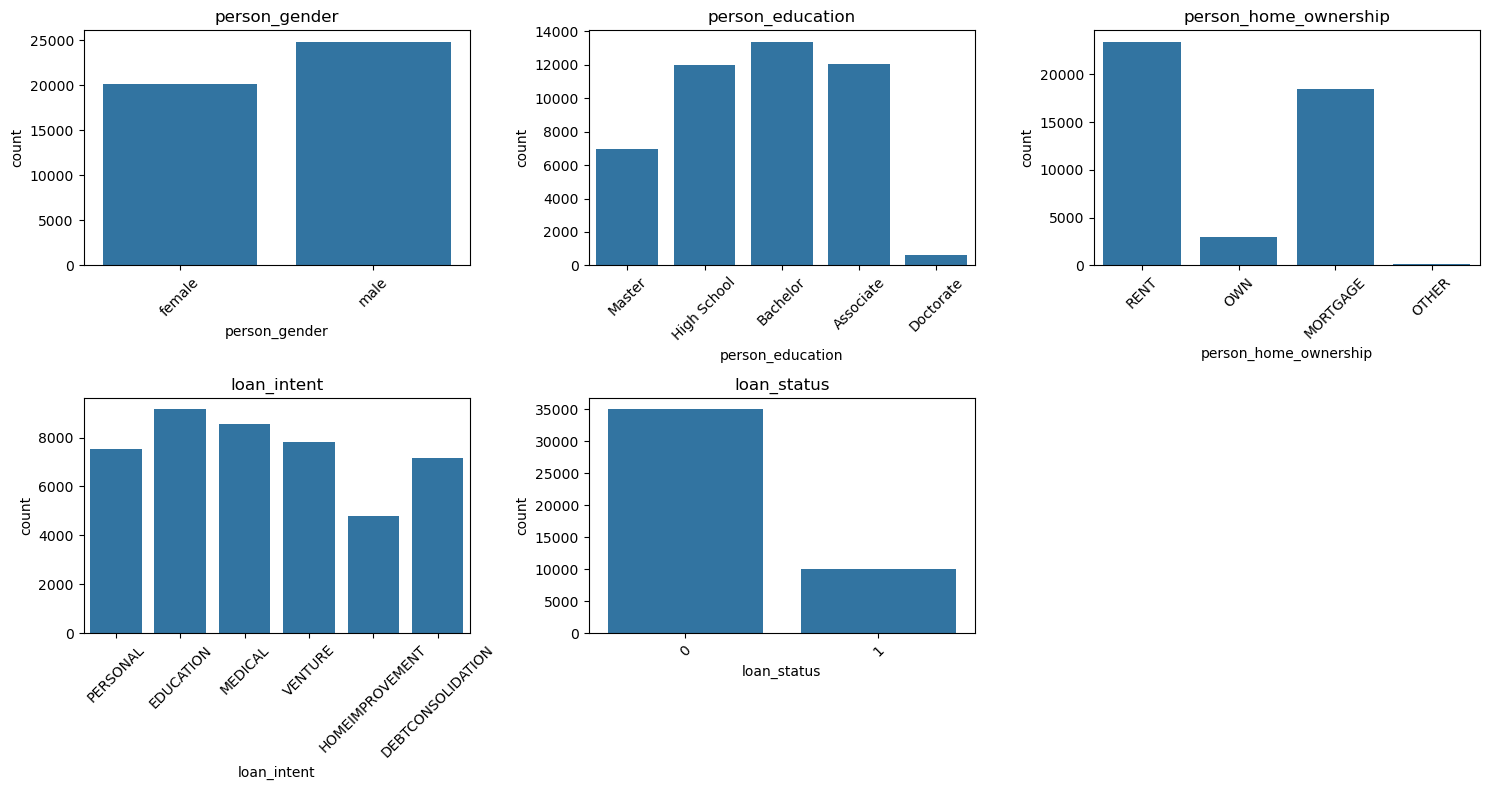

In [14]:
# Plot the count of categorical features
categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'loan_status']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='loan_status', ylabel='person_income'>

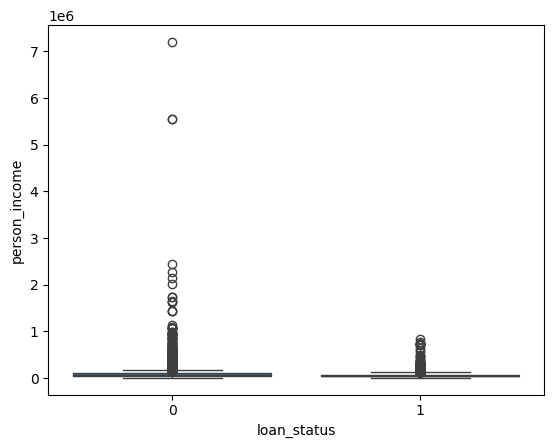

In [15]:
# box plot for income with loan status
sns.boxplot(x='loan_status', y='person_income', data=df)

Text(0.5, 1.0, 'Age vs. Credit Score (colored by Loan Status)')

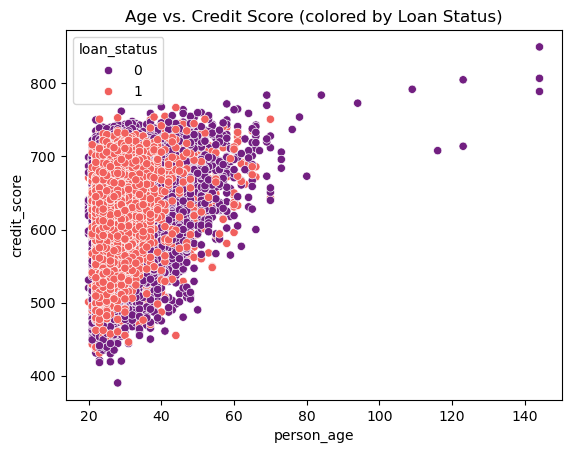

In [16]:
# scatter plot with loan status
sns.scatterplot(x='person_age', y='credit_score', hue='loan_status', data=df, palette='magma')
plt.title("Age vs. Credit Score (colored by Loan Status)")

In [17]:
# drop people age more than 75
df = df[df['person_age'] <= 75]

Encoding and Scaling

In [19]:
from sklearn.preprocessing import LabelEncoder

# Columns you want to label encode
columns_to_encode = ['person_gender', 'previous_loan_defaults_on_file']

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [20]:
# Example of creating new features
#Income to Loan Ratio: A feature like loan_amnt / person_income can be insightful.
#Interest-to-Income Ratio: loan_int_rate / person_income may show how much burden the loan interest is relative to income.
df['income_to_loan_ratio'] = df['loan_amnt'] / df['person_income']
df['interest_to_income_ratio'] = df['loan_int_rate'] / df['person_income']

In [21]:
# Select only the desired columns
df_selected_columns = df[['income_to_loan_ratio', 'interest_to_income_ratio']]

# Display the selected columns
print(df_selected_columns.head())

   income_to_loan_ratio  interest_to_income_ratio
0              0.486462                  0.000223
1              0.081420                  0.000907
2              0.442193                  0.001035
3              0.438855                  0.000191
4              0.529221                  0.000216


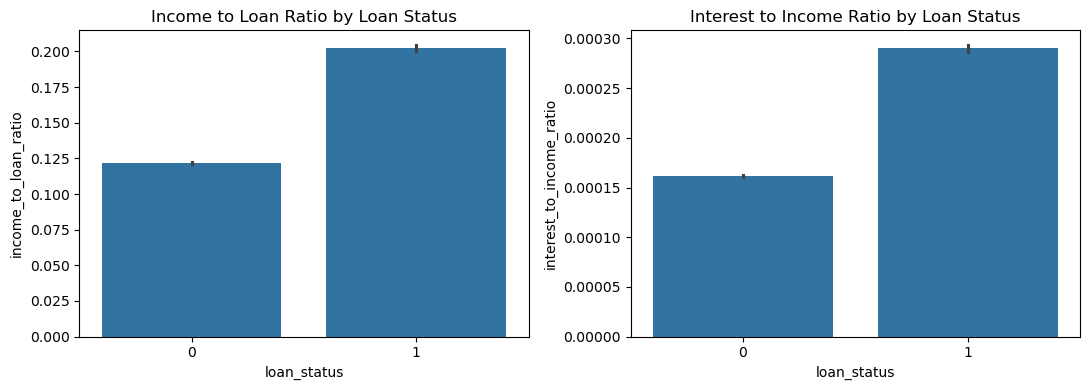

In [22]:
# Create two side-by-side bar plots
plt.figure(figsize=(11, 4))

# Plot 1: Income to Loan Ratio by Loan Status
plt.subplot(1, 2, 1)
sns.barplot(x='loan_status', y='income_to_loan_ratio', data=df)
plt.title('Income to Loan Ratio by Loan Status')

# Plot 2: Interest to Income Ratio by Loan Status
plt.subplot(1, 2, 2)
sns.barplot(x='loan_status', y='interest_to_income_ratio', data=df)
plt.title('Interest to Income Ratio by Loan Status')

# Display the plots
plt.tight_layout()
plt.show()

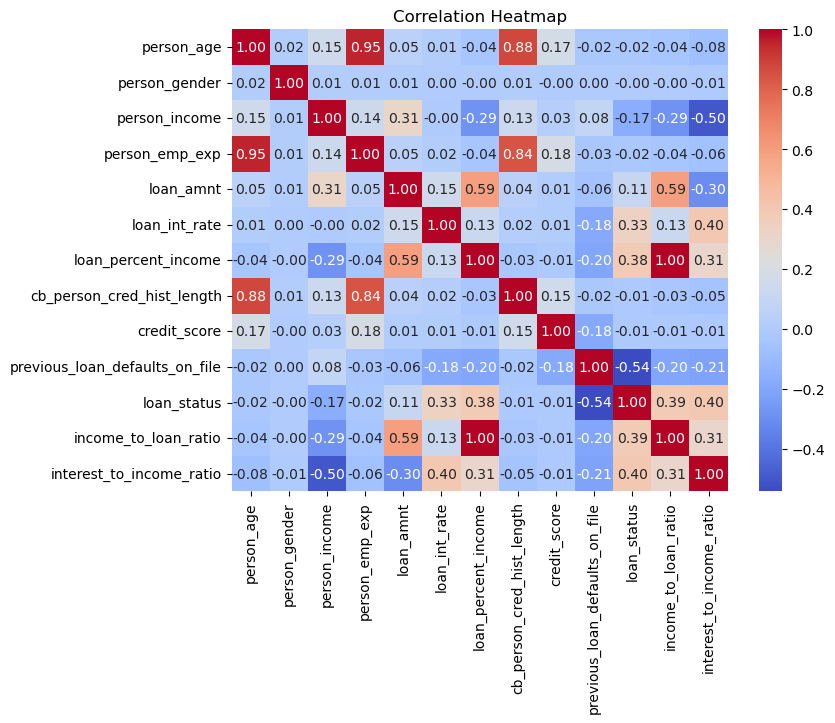

In [23]:
# correlation matrix excluding non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap again
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 Using Random Forest Classifier

In [25]:
# Specify the columns you want to include in your features
selected_features = ['loan_int_rate', 'loan_percent_income','previous_loan_defaults_on_file','income_to_loan_ratio','interest_to_income_ratio']

# Define X as only the selected feature columns
X = df[selected_features]

# Define y as the target variable (loan status)
y = df['loan_status']

In [26]:
#preprocessing numerical and categorical
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), selected_features),    ])

In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# model : random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [29]:
# Train the Random Forest Classifier on the original (non-SMOTEd) training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_preprocessed)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9089


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6999
           1       0.81      0.77      0.79      1999

    accuracy                           0.91      8998
   macro avg       0.87      0.86      0.87      8998
weighted avg       0.91      0.91      0.91      8998



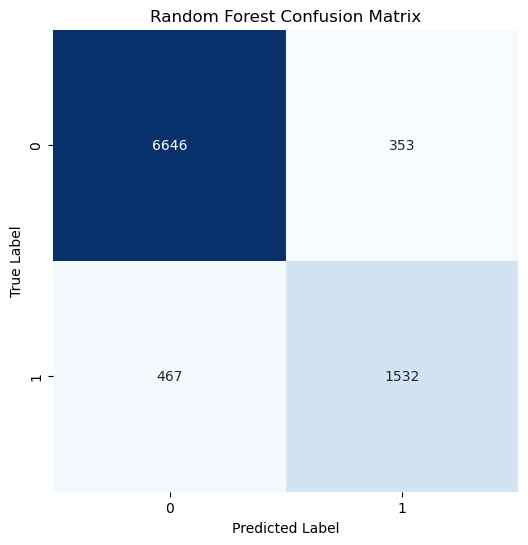

In [32]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))  # Increased figure size for better readability
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

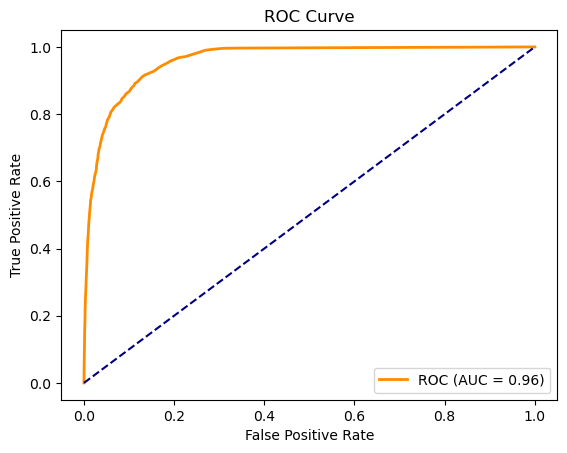

AUC: 0.96


In [33]:
from sklearn.metrics import roc_curve, auc
# Train model, get ROC curve, and calculate AUC
fpr, tpr, _ = roc_curve(y_test, RandomForestClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve and display AUC
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print(f"AUC: {roc_auc:.2f}")

Using Support Vector Machine (SVM) Classifier

In [35]:
from sklearn.svm import SVC

# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [36]:
# Initialize and train the SVM classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_preprocessed, y_train)

SVC(random_state=42)

In [37]:
# Make predictions
y_pred = svm_classifier.predict(X_test_preprocessed)

In [38]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.902200488997555
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6999
           1       0.80      0.74      0.77      1999

    accuracy                           0.90      8998
   macro avg       0.86      0.85      0.85      8998
weighted avg       0.90      0.90      0.90      8998



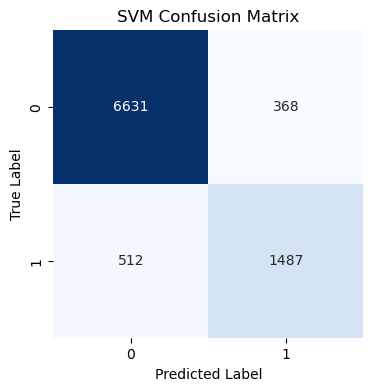

In [39]:
# Compute confusion matrix
svm_cm = confusion_matrix(y_test, y_pred)  # Ensure you replace y_pred with SVM predictions

# Plot the confusion matrix
plt.figure(figsize=(4,4))  # Increased figure size for better readability
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()